In [1]:
!pip install numpy

In [1]:
import numpy as np #Import numpy
import disropt as do #Import the distributed optimisation library
import matplotlib.pyplot as plt
import pickle

Data loading

In [2]:
def load_data(filename, constraint_counts):
    file_str = str("Tests/" + filename + "/")
    N = np.load(str(file_str + "agents.npy"))
    S = constraint_counts
    x_sequence, y_sequence, local_obj_function = {}, {}, {}
    for i in range(N):
        y_sequence[i] = np.load(str(file_str+"agent_{}_allocation_sequence.npy".format(i)))
        x_sequence[i] = np.load(str(file_str+"agent_{}_primal_sequence.npy".format(i)))
        with open(str(file_str+'agent_{}_obj_function.pkl'.format(i)), 'rb') as input:
            local_obj_function[i] = pickle.load(input)
    return N, x_sequence, y_sequence, local_obj_function

Plotting

In [3]:
def plot_test(testname, constraint_count):
    file_string = str(testname)
    N, x_sequence, y_sequence, local_obj_function = load_data(file_string, constraint_count)
    # plot cost of primal sequence
    plt.figure()
    plt.title("Primal cost")

    iterations = x_sequence[0].shape[0]
    obj_function = np.zeros([iterations, 1])
    for k in range(iterations):
        for i in range(N):
            obj_function[k] += local_obj_function[i].eval(x_sequence[i][k, :, 0].reshape(-1,1)).flatten()

    plt.semilogy(obj_function)

    plt.show()
    
def plot_tests(testnames, constraint_count, logy = False):
    x_sequences, y_sequences, local_obj_functions = [], [], []
    for testname in testnames:
        file_string = str(testname)
        N, x_sequence, y_sequence, local_obj_function = load_data(file_string, constraint_count)
        x_sequences.append(x_sequence)
        y_sequences.append(y_sequence)
        local_obj_functions.append(local_obj_function)
    # plot cost of primal sequence
    plt.figure()
    plt.title("Primal cost")
    
    for j in range(len(x_sequences)):
        iterations = x_sequences[j][0].shape[0]
        obj_function = np.zeros([iterations, 1])
        for k in range(iterations):
            for i in range(N):
                obj_function[k] += local_obj_functions[j][i].eval(x_sequences[j][i][k, :, 0].reshape(-1,1)).flatten()
        if logy:
            plt.semilogy(obj_function, label = testnames[j])
        else:
            plt.plot(obj_function, label = testnames[j])
    plt.legend()
    plt.show()

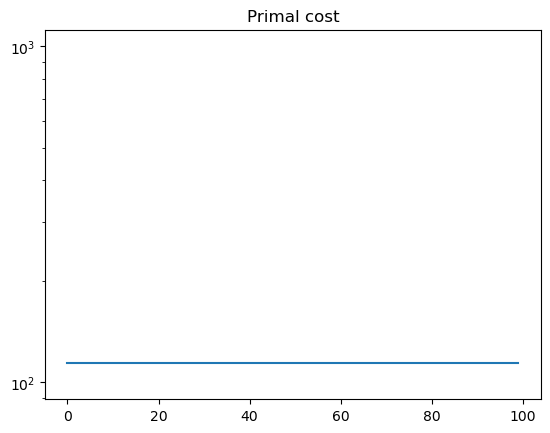

In [49]:
plot_test("uninftest1", 1)

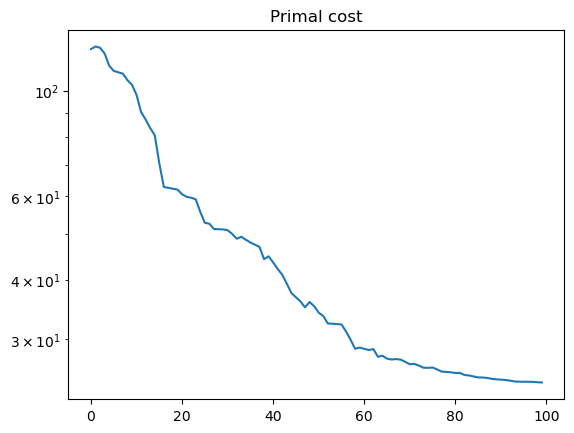

In [57]:
plot_test("gatest1", 1)

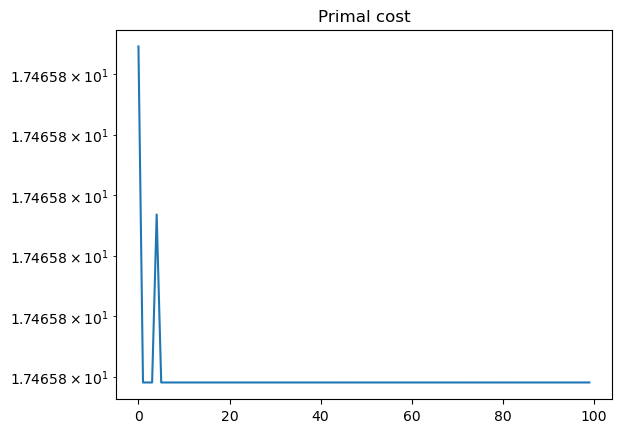

In [59]:
plot_test("primaltest1", 1)

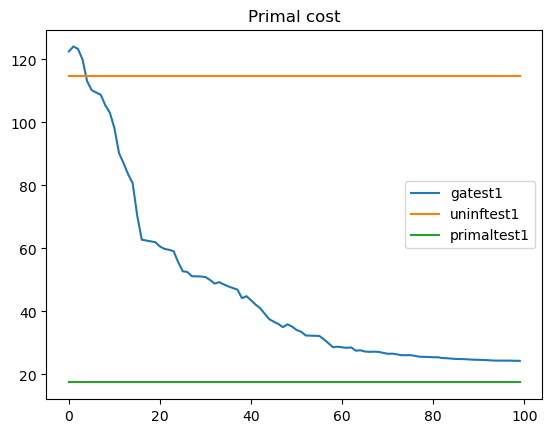

In [52]:
plot_tests(["gatest1", "uninftest1", "primaltest1"], 1, False)

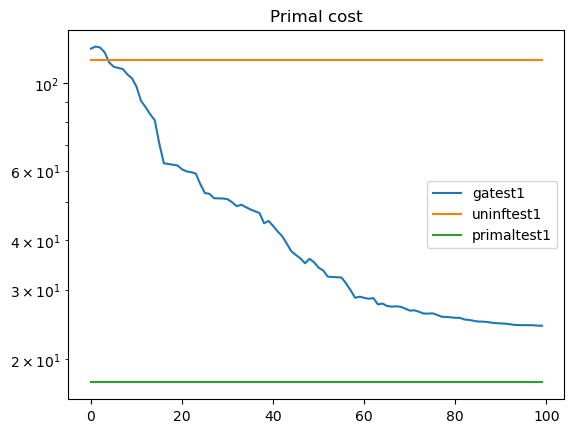

In [51]:
plot_tests(["gatest1", "uninftest1", "primaltest1"], 1, True)

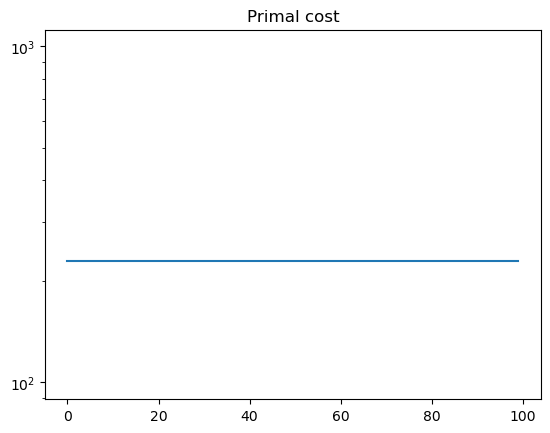

In [4]:
plot_test("multiuninftest", 1)

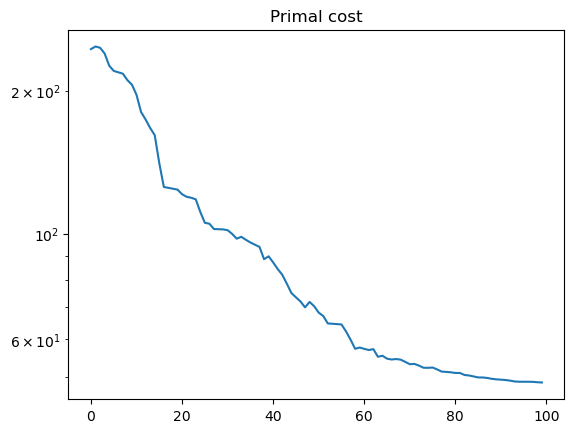

In [6]:
plot_test("multigatest", 1)

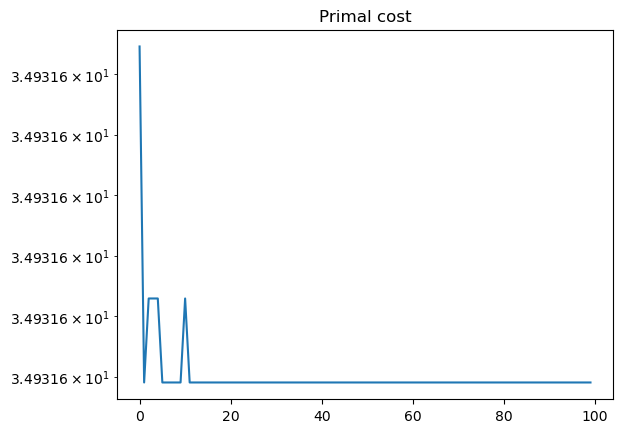

In [7]:
plot_test("multiprimaltest", 1)

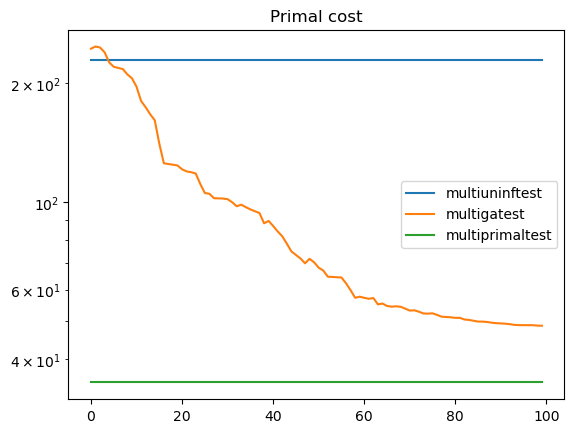

In [8]:
plot_tests(["multiuninftest","multigatest","multiprimaltest"], 1, True)

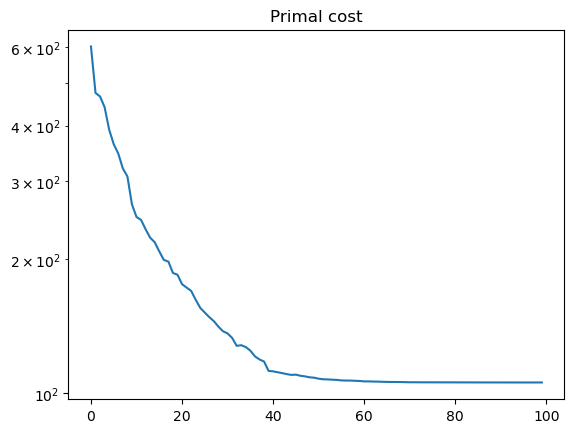

In [13]:
plot_test("compgatest", 3)

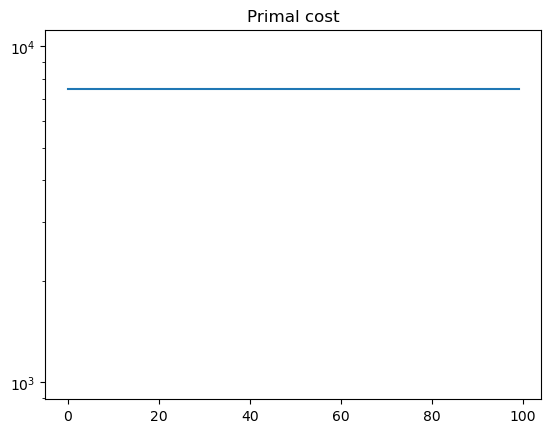

In [15]:
plot_test("compuninftest", 3)

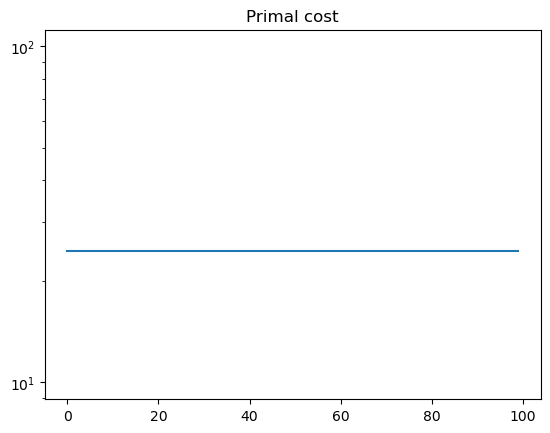

In [12]:
plot_test("compprimaltest", 3)

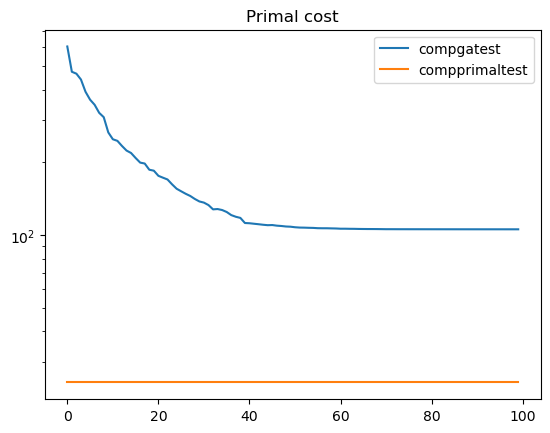

In [16]:
plot_tests(["compgatest", "compprimaltest"], 3, True)

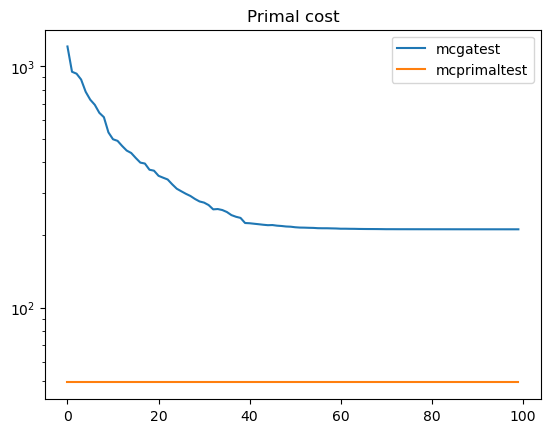

In [17]:
plot_tests(["mcgatest", "mcprimaltest"], 3, True)

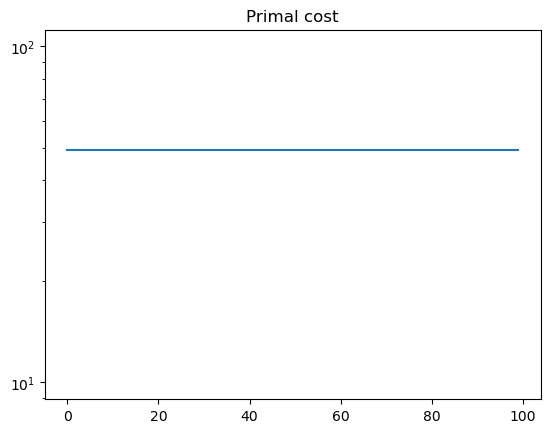

In [20]:
plot_test("mcprimaltest", 3)

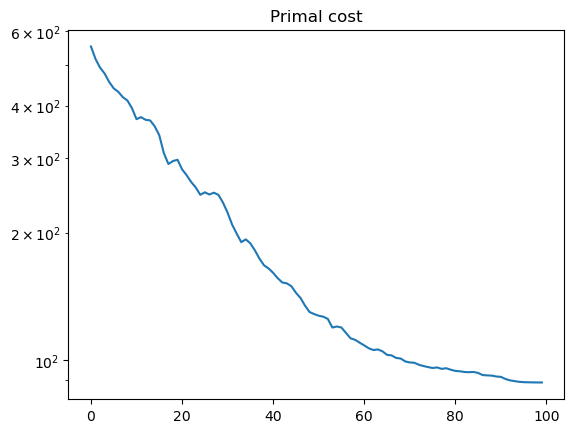

In [22]:
plot_test("impgatest", 3)